In [57]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:

ce5 = pd.read_csv('../data/slurm_wrapper_ce5.log',
                  header=None,
                  delimiter=' - ',
                  engine='python')

ce5.head()

,0,1,2,3,4,5
0,2020-10-16 08:15:39.278699,user 0,retry 0,time 0.07347559928894043,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
1,2020-10-16 08:18:08.313309,user 0,retry 0,time 0.18363237380981445,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
2,2020-10-16 08:22:48.128689,user 0,retry 0,time 0.07547116279602051,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
3,2020-10-16 08:25:13.257408,user 0,retry 0,time 0.09484362602233887,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
4,2020-10-16 08:31:01.460723,user 0,retry 0,time 0.07498788833618164,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."


In [28]:
ce5.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [29]:
ce5.duplicated().sum()

0

In [30]:
ce5['loggedtime']= ce5[0].apply(lambda x : x[:19])

In [31]:
ce5['jobname'] = ce5[5].apply(lambda x : x[10:-1].split(',')[0].replace("'", "").strip().split('/')[3])

In [32]:
ce5['respoonseTime'] = ce5[3].apply(lambda x : x.split('.')[0][5:])

In [33]:
ce5['user'] = ce5[1].apply(lambda x : x[5:])

In [34]:
ce5['retry']= ce5[2].apply(lambda x : x[6:])

In [35]:
ce5['returncode']= ce5[4].apply(lambda x : x[11:])

In [36]:
ce5.isna().sum()

0                0
1                0
2                0
3                0
4                0
5                0
loggedtime       0
jobname          0
respoonseTime    0
user             0
retry            0
returncode       0
dtype: int64

In [37]:
#cleaned frame
ce5

,0,1,2,3,4,5,loggedtime,jobname,respoonseTime,user,retry,returncode
0,2020-10-16 08:15:39.278699,user 0,retry 0,time 0.07347559928894043,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",2020-10-16 08:15:39,sacct,0,0,0,0
1,2020-10-16 08:18:08.313309,user 0,retry 0,time 0.18363237380981445,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",2020-10-16 08:18:08,sacct,0,0,0,0
2,2020-10-16 08:22:48.128689,user 0,retry 0,time 0.07547116279602051,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",2020-10-16 08:22:48,sacct,0,0,0,0
3,2020-10-16 08:25:13.257408,user 0,retry 0,time 0.09484362602233887,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",2020-10-16 08:25:13,sacct,0,0,0,0
4,2020-10-16 08:31:01.460723,user 0,retry 0,time 0.07498788833618164,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",2020-10-16 08:31:01,sacct,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4770888,2021-10-07 21:58:06.738329,user 9203,retry 0,time 0.02677178382873535,returncode 0,"command ['/usr/bin/squeue', '-o', '%i %T', '-u...",2021-10-07 21:58:06,squeue,0,9203,0,0
4770889,2021-10-07 21:58:15.931559,user 9201,retry 0,time 0.04166150093078613,returncode 0,"command ['/usr/bin/squeue', '-o', '%i %T', '-u...",2021-10-07 21:58:15,squeue,0,9201,0,0
4770890,2021-10-07 21:58:48.900136,user 9221,retry 0,time 0.14348959922790527,returncode 0,"command ['/usr/bin/squeue', '-o', '%i %T', '-u...",2021-10-07 21:58:48,squeue,0,9221,0,0
4770891,2021-10-07 21:59:11.314056,user 9203,retry 0,time 0.026599407196044922,returncode 0,"command ['/usr/bin/squeue', '-o', '%i %T', '-u...",2021-10-07 21:59:11,squeue,0,9203,0,0


In [38]:
#Lets grab the cleaned columns.
ce5log_df = ce5.reindex(columns = ['loggedtime','user','jobname','respoonseTime','returncode','retry'])

In [39]:
ce5log_date_returncode_group_df=ce5log_df.groupby(['loggedtime','returncode']).count().reset_index()[['loggedtime','returncode']]
ce5log_date_returncode_group_df

,loggedtime,returncode
0,2020-10-16 08:15:39,0
1,2020-10-16 08:18:08,0
2,2020-10-16 08:22:48,0
3,2020-10-16 08:25:13,0
4,2020-10-16 08:31:01,0
...,...,...
1767859,2021-10-07 21:58:06,0
1767860,2021-10-07 21:58:15,0
1767861,2021-10-07 21:58:48,0
1767862,2021-10-07 21:59:11,0


In [40]:
#lets convert the log time to date time so that we can sort to see the pattern
ce5log_date_returncode_group_df['loggedtime'] = pd.to_datetime(ce5log_date_returncode_group_df['loggedtime'],errors='coerce')
ce5log_date_returncode_group_df

,loggedtime,returncode
0,2020-10-16 08:15:39,0
1,2020-10-16 08:18:08,0
2,2020-10-16 08:22:48,0
3,2020-10-16 08:25:13,0
4,2020-10-16 08:31:01,0
...,...,...
1767859,2021-10-07 21:58:06,0
1767860,2021-10-07 21:58:15,0
1767861,2021-10-07 21:58:48,0
1767862,2021-10-07 21:59:11,0


In [41]:
ce5log_date_returncode_group_df['nextRetCode']= ce5log_date_returncode_group_df.returncode.rolling(25).mean()
ce5log_date_returncode_group_df[ce5log_date_returncode_group_df['nextRetCode'] > 1]

,loggedtime,returncode,nextRetCode
3677,2020-10-16 17:42:38,140,5.6
3678,2020-10-16 17:42:41,140,11.2
3679,2020-10-16 17:42:43,140,16.8
3680,2020-10-16 17:42:44,140,22.4
3681,2020-10-16 17:42:45,140,28.0
...,...,...,...
1739348,2021-10-02 19:24:14,0,5.6
1739349,2021-10-02 19:24:39,0,5.6
1739350,2021-10-02 19:24:59,0,5.6
1739351,2021-10-02 19:25:00,0,5.6


## below is specific to batch type

In [42]:
ce5log_df_sbatch = ce5log_df[ce5log_df['jobname'] == 'sbatch']

In [43]:
ce5log_df_sbatch

,loggedtime,user,jobname,respoonseTime,returncode,retry
29,2020-10-16 08:32:25,9201,sbatch,0,0,0
30,2020-10-16 08:32:25,9201,sbatch,0,0,0
34,2020-10-16 08:32:53,9201,sbatch,0,0,0
35,2020-10-16 08:32:53,9201,sbatch,0,0,0
36,2020-10-16 08:32:53,9201,sbatch,0,0,0
...,...,...,...,...,...,...
4770843,2021-10-07 21:44:59,9204,sbatch,0,0,0
4770868,2021-10-07 21:53:47,9204,sbatch,0,0,0
4770871,2021-10-07 21:54:51,9203,sbatch,0,0,0
4770873,2021-10-07 21:55:01,9203,sbatch,0,0,0


In [45]:
#look for return code = 1 to see non-response from server, find timestamp of having more non-responses
ce5log_sbatch_date_returncode_group_df=ce5log_df_sbatch[ce5log_df_sbatch['returncode'].astype('int') == 1].groupby(['loggedtime','returncode']).count().reset_index()[['loggedtime','user']]
#ce5log_sbatch_date_returncode_group_df = ce5log_sbatch_date_returncode_group_df.rename(columns={'user':'count'})
ce5log_sbatch_date_returncode_group_df

,loggedtime,user
0,2020-10-16 11:43:45,3
1,2020-10-16 11:43:46,2
2,2020-10-16 11:43:54,1
3,2020-10-16 22:21:13,1
4,2020-10-16 22:21:33,1
...,...,...
34171,2021-09-24 19:13:14,1
34172,2021-09-24 20:16:31,1
34173,2021-10-02 08:14:16,1
34174,2021-10-02 17:28:16,1


In [47]:
ce5log_sbatch_date_returncode_group_df

,loggedtime,user
0,2020-10-16 11:43:45,3
1,2020-10-16 11:43:46,2
2,2020-10-16 11:43:54,1
3,2020-10-16 22:21:13,1
4,2020-10-16 22:21:33,1
...,...,...
34171,2021-09-24 19:13:14,1
34172,2021-09-24 20:16:31,1
34173,2021-10-02 08:14:16,1
34174,2021-10-02 17:28:16,1


In [48]:
#lets convert the log time to date time so that we can sort to see the pattern
ce5log_sbatch_date_returncode_group_df['loggedtime'] = pd.to_datetime(
    ce5log_sbatch_date_returncode_group_df['loggedtime'],
    errors='coerce'
)
ce5log_sbatch_date_returncode_group_df

,loggedtime,user
0,2020-10-16 11:43:45,3
1,2020-10-16 11:43:46,2
2,2020-10-16 11:43:54,1
3,2020-10-16 22:21:13,1
4,2020-10-16 22:21:33,1
...,...,...
34171,2021-09-24 19:13:14,1
34172,2021-09-24 20:16:31,1
34173,2021-10-02 08:14:16,1
34174,2021-10-02 17:28:16,1


In [50]:
ce5log_sbatch_date_returncode_group_df = ce5log_sbatch_date_returncode_group_df.sort_values(by=['loggedtime','user'],ascending=[True,True])

In [51]:
ce5log_sbatch_date_returncode_group_df=ce5log_sbatch_date_returncode_group_df.rename(columns={'user':'count'})
ce5log_sbatch_date_returncode_group_df


,loggedtime,count
0,2020-10-16 11:43:45,3
1,2020-10-16 11:43:46,2
2,2020-10-16 11:43:54,1
3,2020-10-16 22:21:13,1
4,2020-10-16 22:21:33,1
...,...,...
34171,2021-09-24 19:13:14,1
34172,2021-09-24 20:16:31,1
34173,2021-10-02 08:14:16,1
34174,2021-10-02 17:28:16,1


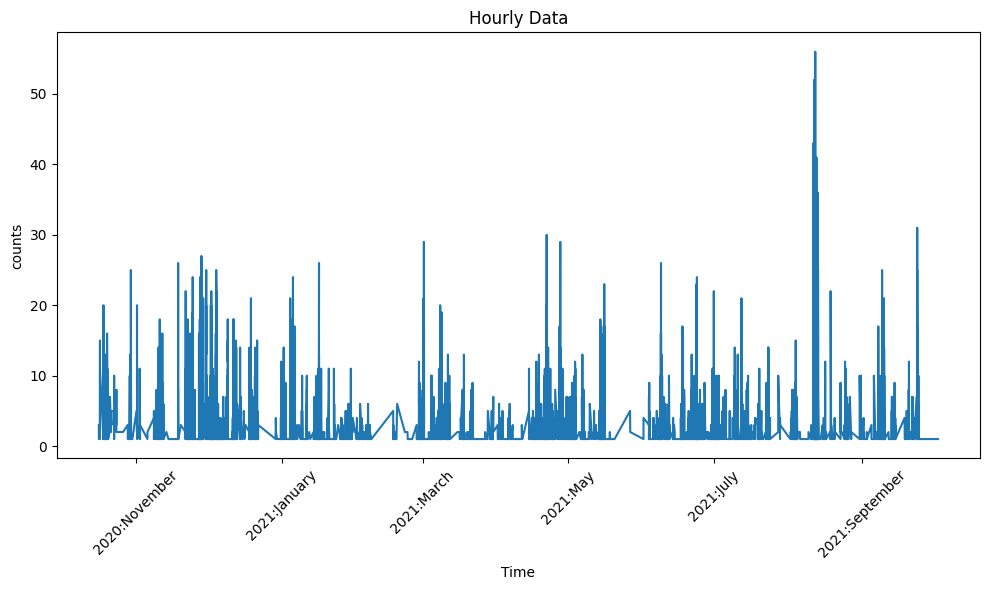

In [59]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(ce5log_sbatch_date_returncode_group_df['loggedtime'], ce5log_sbatch_date_returncode_group_df['count'])
plt.xlabel('Time')
plt.ylabel('counts')
plt.title('Hourly Data')

# Format the x-axis for hourly data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y:%B'))
#plt.gca().xaxis.set_major_locator(mdates.HourLocator())

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [107]:
oct2020= ce5log_sbatch_date_returncode_group_df[(
    ce5log_sbatch_date_returncode_group_df['loggedtime'] >= '2021-08-11'
) & (ce5log_sbatch_date_returncode_group_df['loggedtime'] <= '2021-08-12'
)]
oct2020

,loggedtime,count
18848,2021-08-11 10:28:19,1
18849,2021-08-11 11:19:05,1
18850,2021-08-11 11:19:06,7
18851,2021-08-11 11:25:13,1
18852,2021-08-11 11:32:24,1
...,...,...
22050,2021-08-11 23:57:26,5
22051,2021-08-11 23:57:28,14
22052,2021-08-11 23:57:29,18
22053,2021-08-11 23:57:37,3


In [103]:
march2021= ce5log_sbatch_date_returncode_group_df[(
    ce5log_sbatch_date_returncode_group_df['loggedtime'] >= '2021-03-01'
) & (ce5log_sbatch_date_returncode_group_df['loggedtime'] <= '2021-03-02'
)]
march2021

,loggedtime,count
10619,2021-03-01 00:11:34,2
10620,2021-03-01 00:11:45,3
10621,2021-03-01 00:11:51,6
10622,2021-03-01 00:12:06,4
10623,2021-03-01 00:12:09,1
...,...,...
11245,2021-03-01 16:22:58,1
11246,2021-03-01 16:23:33,1
11247,2021-03-01 18:25:33,1
11248,2021-03-01 18:52:36,1


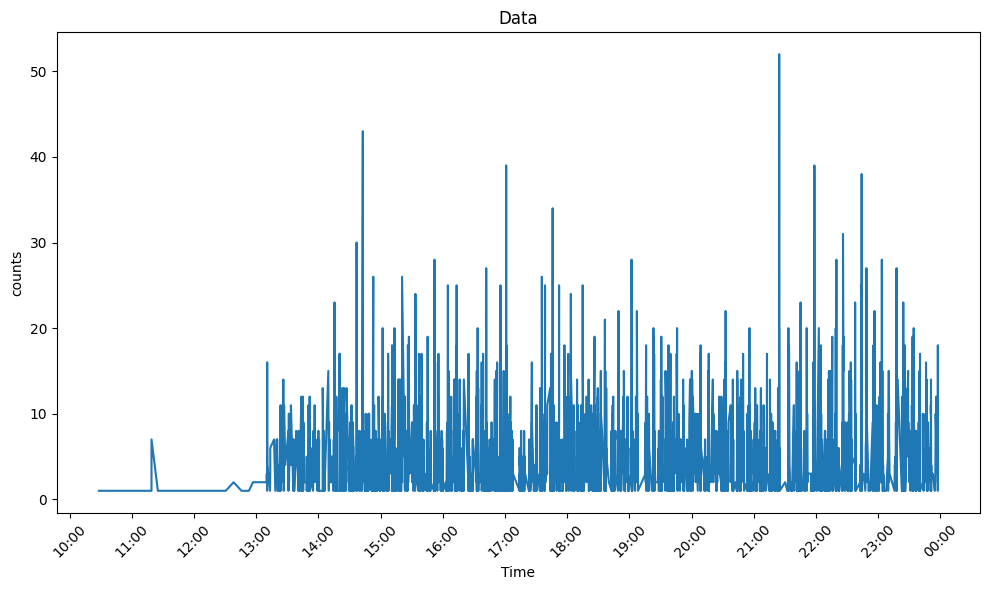

In [108]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(oct2020['loggedtime'], oct2020['count'])
plt.xlabel('Time')
plt.ylabel('counts')
plt.title('Data')

# Format the x-axis for hourly data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator())

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()